## Predicting a startup company success or failure using machine learning
This notebook attemping to build a machine learning model capable of predicting whether or not statrup company has succeeded based on company's activity features 

### Description of the whole process
 As the goal of task is to understand and explain the reason behind success or failure of startup companies I took the following approach to solve the problem. 
 1. Exploring the data, to find out data if there are missing values, categorical data, numerical data or text data.
 2. Picking those data features with has enough impact on dependant variable(success or failure).
 3. Cleaning the data and filling numerical missing values with median or mean of the column and categories with 'Unknown'.
 4. Preparing data for the machine learning model such converting to categotical features into numerical values.
 5. Determining the problem as classification problem and choosing a model using Scikit-learn machine learning library. RandomForestClassifier was choosen.
 6. Training the model with the data.
 7. After training the model to predict success or failure of a given company there is a feature_importances_ property in RandomForestClassifier model wich gives an opportunity to view the those features wich has the most impact to model predictions.
 
 

## Note! 
I picked up 12 features from dataset just to show my approch of solving the problem. 

### Preparing the tools
I'm going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
na_vals = ['No Info']
df = pd.read_csv("data.csv", usecols=['Dependent-Company Status',
                                      'year of founding',
                                      'Age of company in years',
                                      'Employee Count',
                                      'Employees count MoM change',
                                      'Has the team size grown',
                                      'Last Funding Amount',
                                      'Number of  Sales Support material',
                                      'Number of Co-founders',
                                      'Number of of advisors',
                                      'Team size Senior leadership',
                                      'Team size all employees',
                                      'Worked in top companies'], na_values=na_vals)


df['Has the team size grown'].replace('no', 'No', inplace=True)
df['Has the team size grown'].replace('yes', 'Yes', inplace=True)
df['Has the team size grown'].replace('YES', 'Yes', inplace=True)
df['Number of  Sales Support material'].replace('High', 'high', inplace=True)


In [3]:
X = df.drop(['Dependent-Company Status'], axis=1)
y = df['Dependent-Company Status']


In [4]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with median
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
num_imputer = SimpleImputer(strategy="median")

# Define columns
cat_features = ['Has the team size grown',
                'Number of  Sales Support material',
                'Worked in top companies']

num_features = ['year of founding',
                'Age of company in years',
                'Employee Count',
                'Employees count MoM change',
                'Last Funding Amount',
                'Number of Co-founders',
                'Number of of advisors',
                'Team size Senior leadership',
                'Team size all employees']

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("num_imputer", num_imputer, num_features),
    
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['No', 'Nothing', 'No', ..., 2.0, 2.0, 15.0],
       ['No', 'medium', 'Yes', ..., 0.0, 4.0, 20.0],
       ['No', 'low', 'Yes', ..., 0.0, 7.0, 10.0],
       ...,
       ['Unknown', 'Unknown', 'Unknown', ..., 0.0, 1.0, 16.5],
       ['Unknown', 'Unknown', 'Unknown', ..., 2.0, 1.0, 16.5],
       ['Unknown', 'Unknown', 'Unknown', ..., 0.0, 1.0, 16.5]],
      dtype=object)

In [5]:
filled_data = pd.DataFrame(filled_X,
                               columns=[
                'Number of  Sales Support material',                  
                'Has the team size grown',
                'Worked in top companies',
                'year of founding',               
                'Age of company in years',
                'Employee Count',
                'Employees count MoM change',
                'Last Funding Amount',
                'Number of Co-founders',
                'Number of of advisors',
                'Team size Senior leadership',
                'Team size all employees'
                ]) 

In [6]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Has the team size grown',
                        'Number of  Sales Support material',
                        'Worked in top companies']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(filled_data)
transformed_X


array([[1.0, 0.0, 0.0, ..., 2.0, 2.0, 15.0],
       [0.0, 0.0, 0.0, ..., 0.0, 4.0, 20.0],
       [0.0, 0.0, 0.0, ..., 0.0, 7.0, 10.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 16.5],
       [0.0, 1.0, 0.0, ..., 2.0, 1.0, 16.5],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 16.5]], dtype=object)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature: 0, Score: 0.07729
Feature: 1, Score: 0.06316
Feature: 2, Score: 0.02457
Feature: 3, Score: 0.01912
Feature: 4, Score: 0.01968
Feature: 5, Score: 0.01448
Feature: 6, Score: 0.03818
Feature: 7, Score: 0.03382
Feature: 8, Score: 0.00838
Feature: 9, Score: 0.00697
Feature: 10, Score: 0.00943
Feature: 11, Score: 0.09635
Feature: 12, Score: 0.08878
Feature: 13, Score: 0.10460
Feature: 14, Score: 0.05194
Feature: 15, Score: 0.07389
Feature: 16, Score: 0.05669
Feature: 17, Score: 0.02519
Feature: 18, Score: 0.07721
Feature: 19, Score: 0.11024


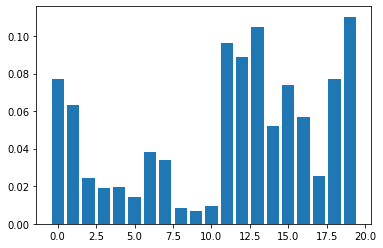

In [8]:
# get importance
importance = model.feature_importances_
# for feature, imp in zip(X ,importance):
#     print(feature, imp)   
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
filled_data

,Number of Sales Support material,Has the team size grown,Worked in top companies,year of founding,Age of company in years,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees
0,No,Nothing,No,2010,4,3,0,450000,1,2,2,15
1,No,medium,Yes,2011,3,13,0,2.8e+06,2,0,4,20
2,No,low,Yes,2011,3,14,0,2.35e+06,3,0,7,10
3,No,low,No,2009,5,45,10,1.025e+07,2,0,4,50
4,No,high,No,2010,4,39,3,5.5e+06,1,1,8,40
...,...,...,...,...,...,...,...,...,...,...,...,...
467,No,Unknown,Unknown,2011,3,13,0,2.8e+06,0,0,1,16.5
468,No,Unknown,Unknown,2010,4,13,0,2.8e+06,0,0,1,16.5
469,Unknown,Unknown,Unknown,2010,4,0,0,2.8e+06,2,0,1,16.5
470,Unknown,Unknown,Unknown,2009,5,13,0,100000,3,2,1,16.5


### As we can see on the plot the most importance and impact on model outcome has the last feature column which is 'Team size all employees' and so on..

In [10]:
model.score(X_test, y_test)

0.7684210526315789

In [11]:
model.score(X_train, y_train)

1.0

In [12]:
model.score(X_test, y_test)

0.7684210526315789